# Defining Problem

empty

# Collecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_palette('viridis')
def figure(size):
    if size == 'small':
        plt.figure(figsize=(6,5))
    elif size == 'big':
        plt.figure(figsize=(16,5), dpi=300)

In [3]:
dataset = pd.read_csv('data/boci_dataset.csv')
dataset.head()

,customer_id,transaction_date,city,customers,purchase
0,7,2023-09-23,Bekasi,member,136
1,22,2023-05-05,Depok,member,142
2,36,2023-12-16,Tangerang,member,156
3,28,2023-03-19,Bekasi,member,179
4,24,2023-01-19,Bekasi,member,164


# Cleaning Data

In [4]:
print(dataset.info())
print("")
print("missing value:")
print(dataset.isnull().sum())
print("")
print(f"duplicated value is {dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       3936 non-null   int64 
 1   transaction_date  3936 non-null   object
 2   city              3936 non-null   object
 3   customers         3936 non-null   object
 4   purchase          3936 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 153.9+ KB
None

missing value:
customer_id         0
transaction_date    0
city                0
customers           0
purchase            0
dtype: int64

duplicated value is 0


In [5]:
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3936 non-null   int64         
 1   transaction_date  3936 non-null   datetime64[ns]
 2   city              3936 non-null   object        
 3   customers         3936 non-null   object        
 4   purchase          3936 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 153.9+ KB


In [7]:
dataset['customers'].unique()

array(['member', 'casual'], dtype=object)

In [8]:
member = dataset[dataset['customers'] == 'member']
casual = dataset[dataset['customers'] == 'casual']

# Analyzing Data

## Univariate Analysis

### Customers

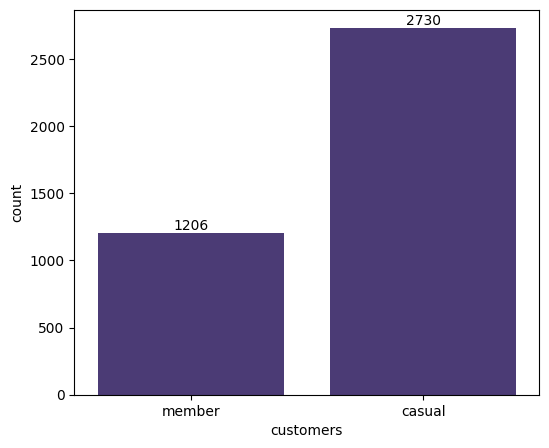

In [9]:
figure('small')
customers_count = sns.countplot(x=dataset['customers'])
customers_count.bar_label(customers_count.containers[0])
plt.show()

### Purchase

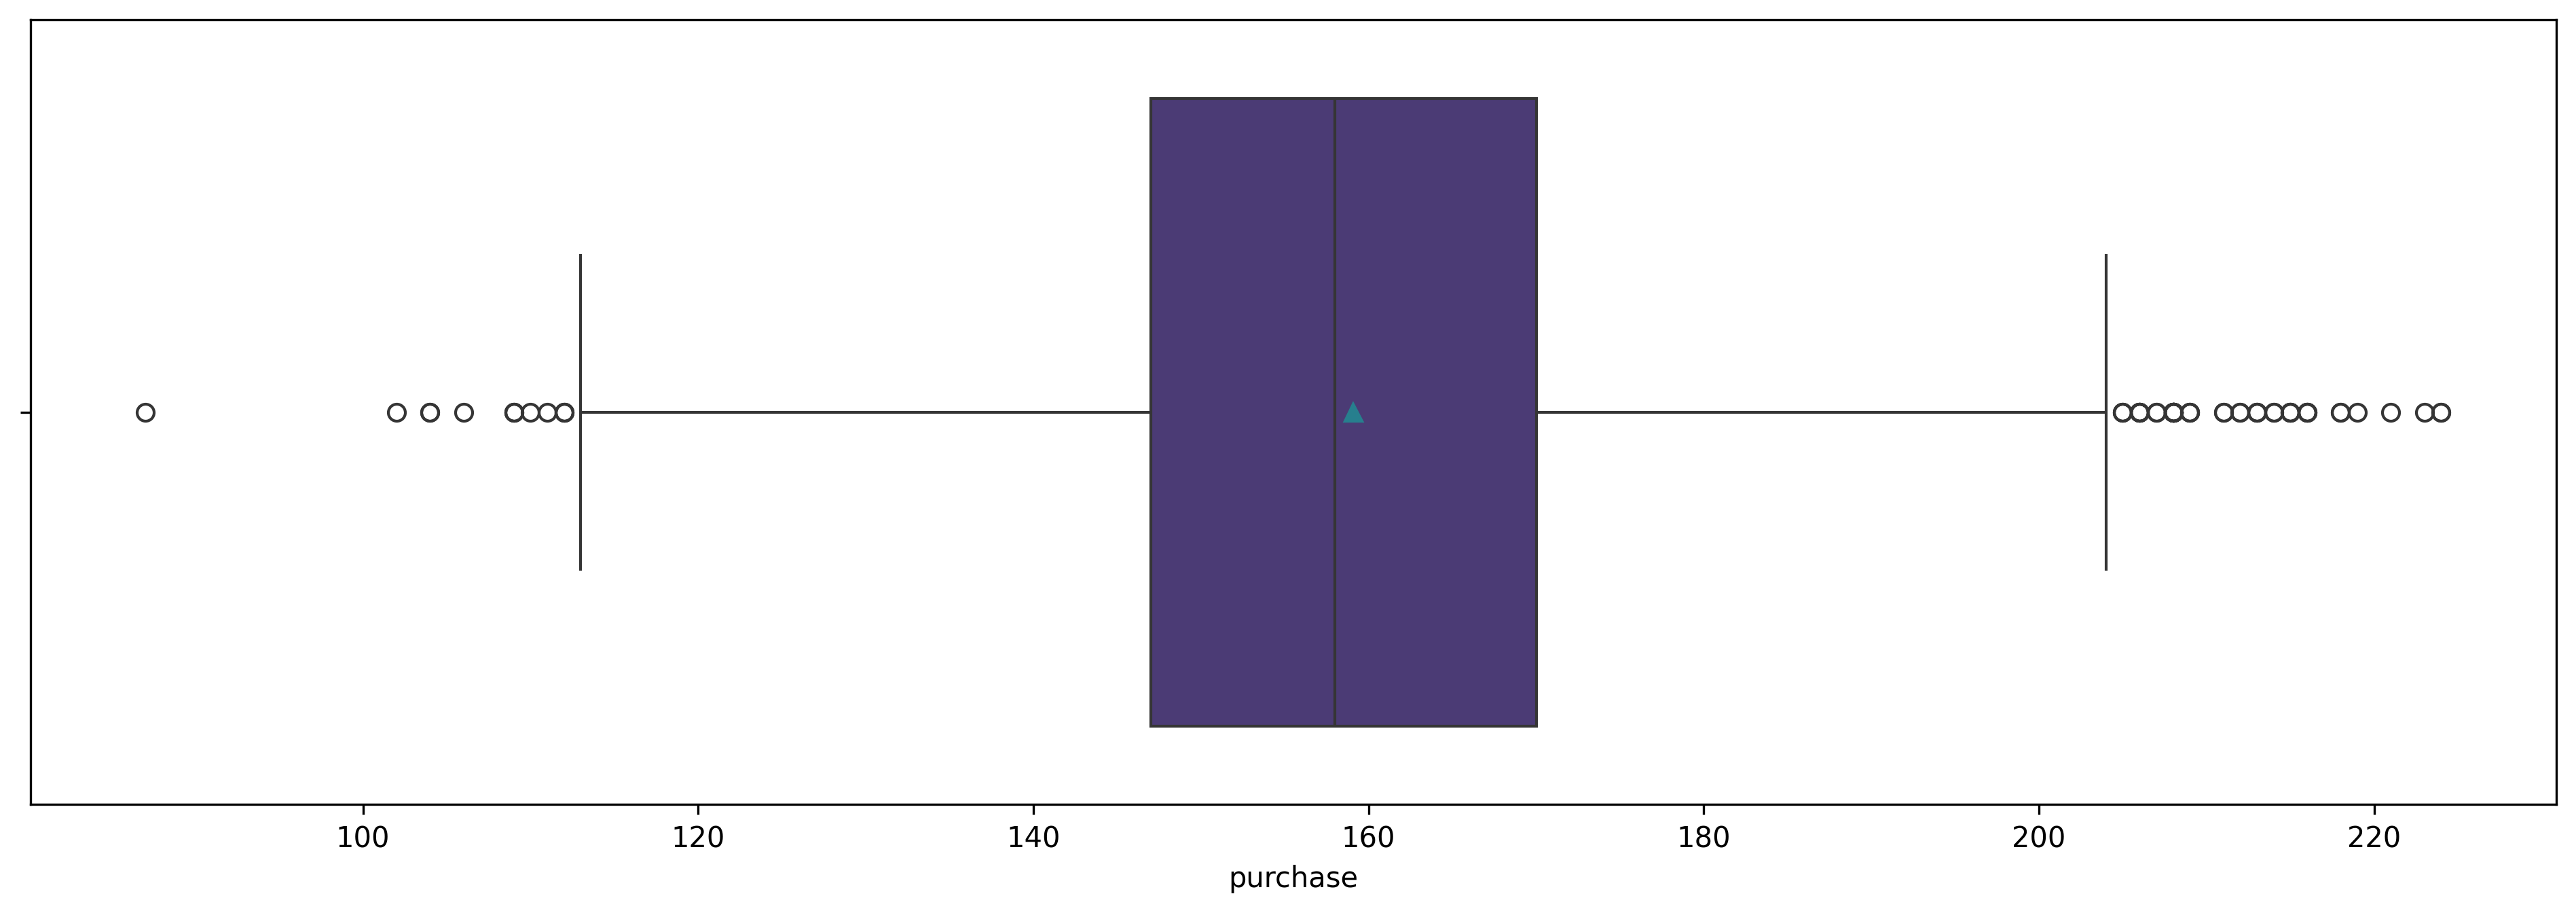

In [10]:
figure('big')
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.show()

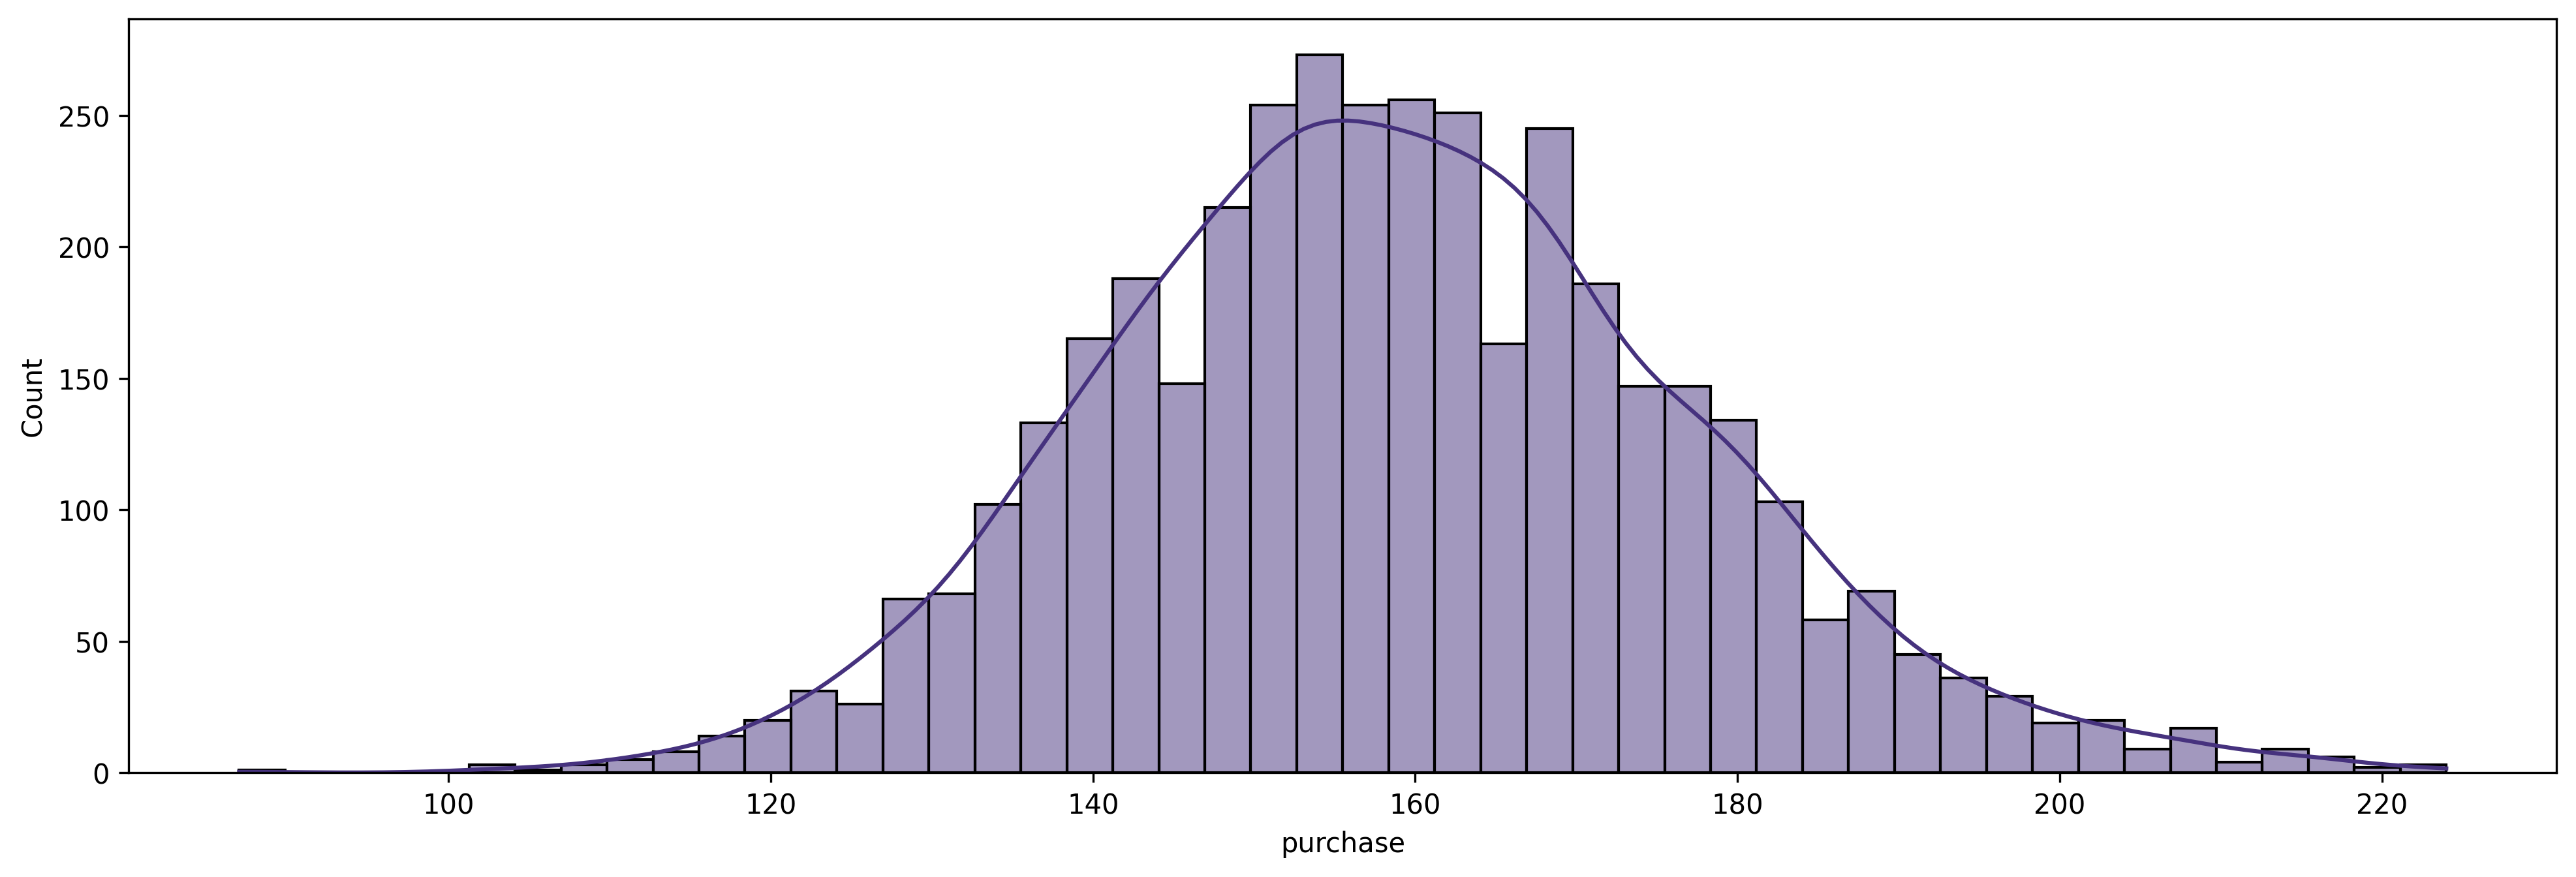

In [11]:
figure('big')
sns.histplot(dataset['purchase'], kde=True)
plt.show()

In [12]:
def normality_test(array):
    stat, p1 = stats.shapiro(array)
    stat, p2 = stats.normaltest(array)
    if p1 >= 0.05:
        print('fail to reject H0 using shapiro test.')
        print(f"the variable is normally distributed with p-value: {p1}.")
    elif p1 < 0.05:
        print('accept to reject H0 using shapiro test.')
        print(f"the variable is not normally distributed with p-value {p1}.")
    print("")
    if p2 >= 0.05:
        print('fail to reject H0 using pearsons test.')
        print(f"the variable is normally distributed with p-value: {p2}.")
    elif p2 < 0.05:
        print('accept to reject H0 using pearsons test.')
        print(f"the variable is not normally distributed with p-value {p2}.")

In [13]:
normality_test(dataset['purchase'])

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 8.919201897216475e-09.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 4.3048519804557063e-10.


In [14]:
q3 = dataset['purchase'].quantile(0.75)
q1 = dataset['purchase'].quantile(0.25)
iqr = q3-q1
upper_line = q3 + (1.5*iqr)
lower_line = q1 - (1.5*iqr)

In [15]:
dataset_clean = dataset[(dataset['purchase'] <= upper_line) & ((dataset['purchase'] >= lower_line))]

In [16]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3873 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3873 non-null   int64         
 1   transaction_date  3873 non-null   datetime64[ns]
 2   city              3873 non-null   object        
 3   customers         3873 non-null   object        
 4   purchase          3873 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 181.5+ KB


In [17]:
normality_test(dataset_clean['purchase'])

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 2.844814267593177e-07.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 1.1680032391972817e-06.


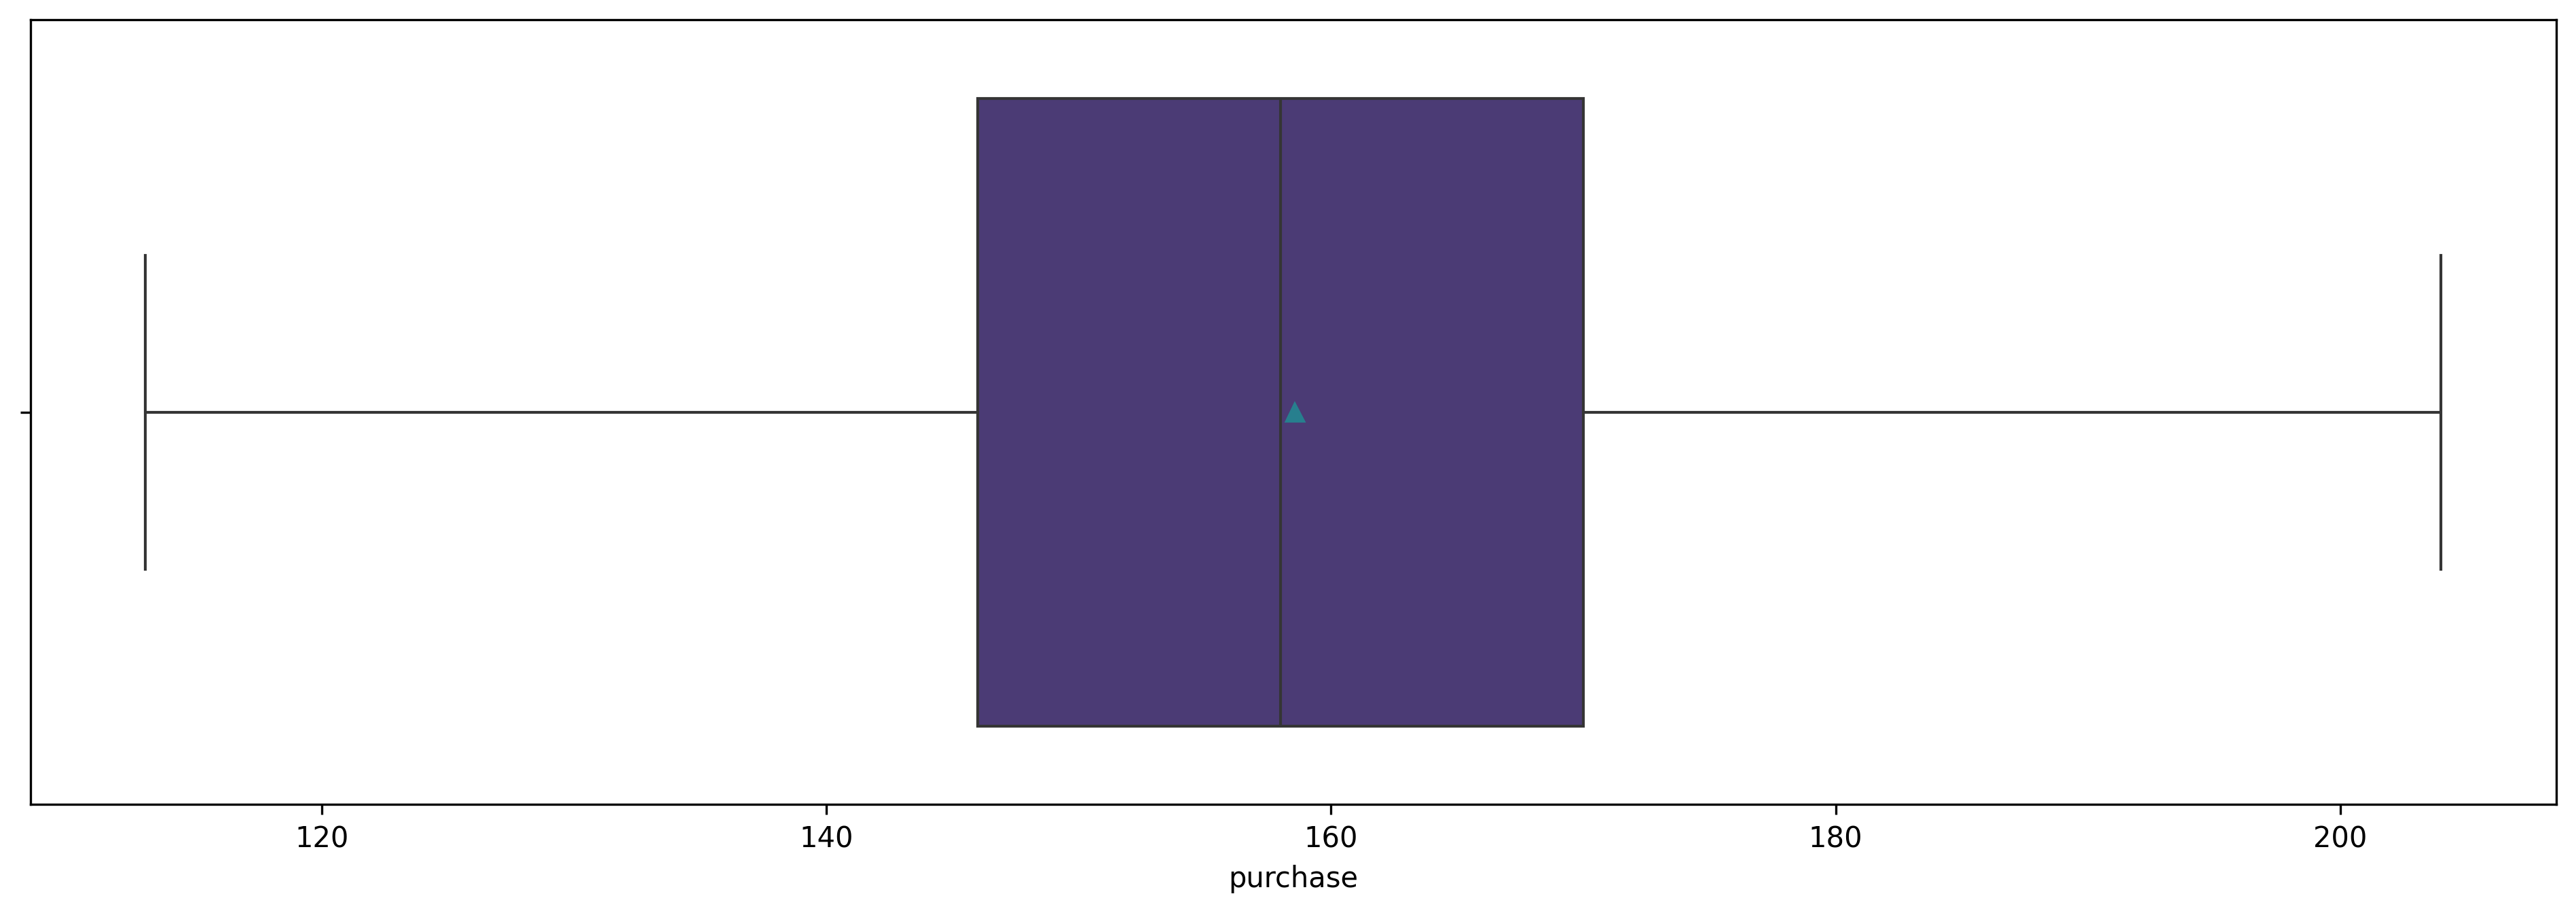


count    3873.000
mean      158.574
std        17.057
min       113.000
25%       146.000
50%       158.000
75%       170.000
max       204.000
Name: purchase, dtype: float64


In [18]:
figure('big')
sns.boxplot(x=dataset_clean['purchase'], showmeans=True)
plt.show()
print("")
print(dataset_clean['purchase'].describe().round(3))

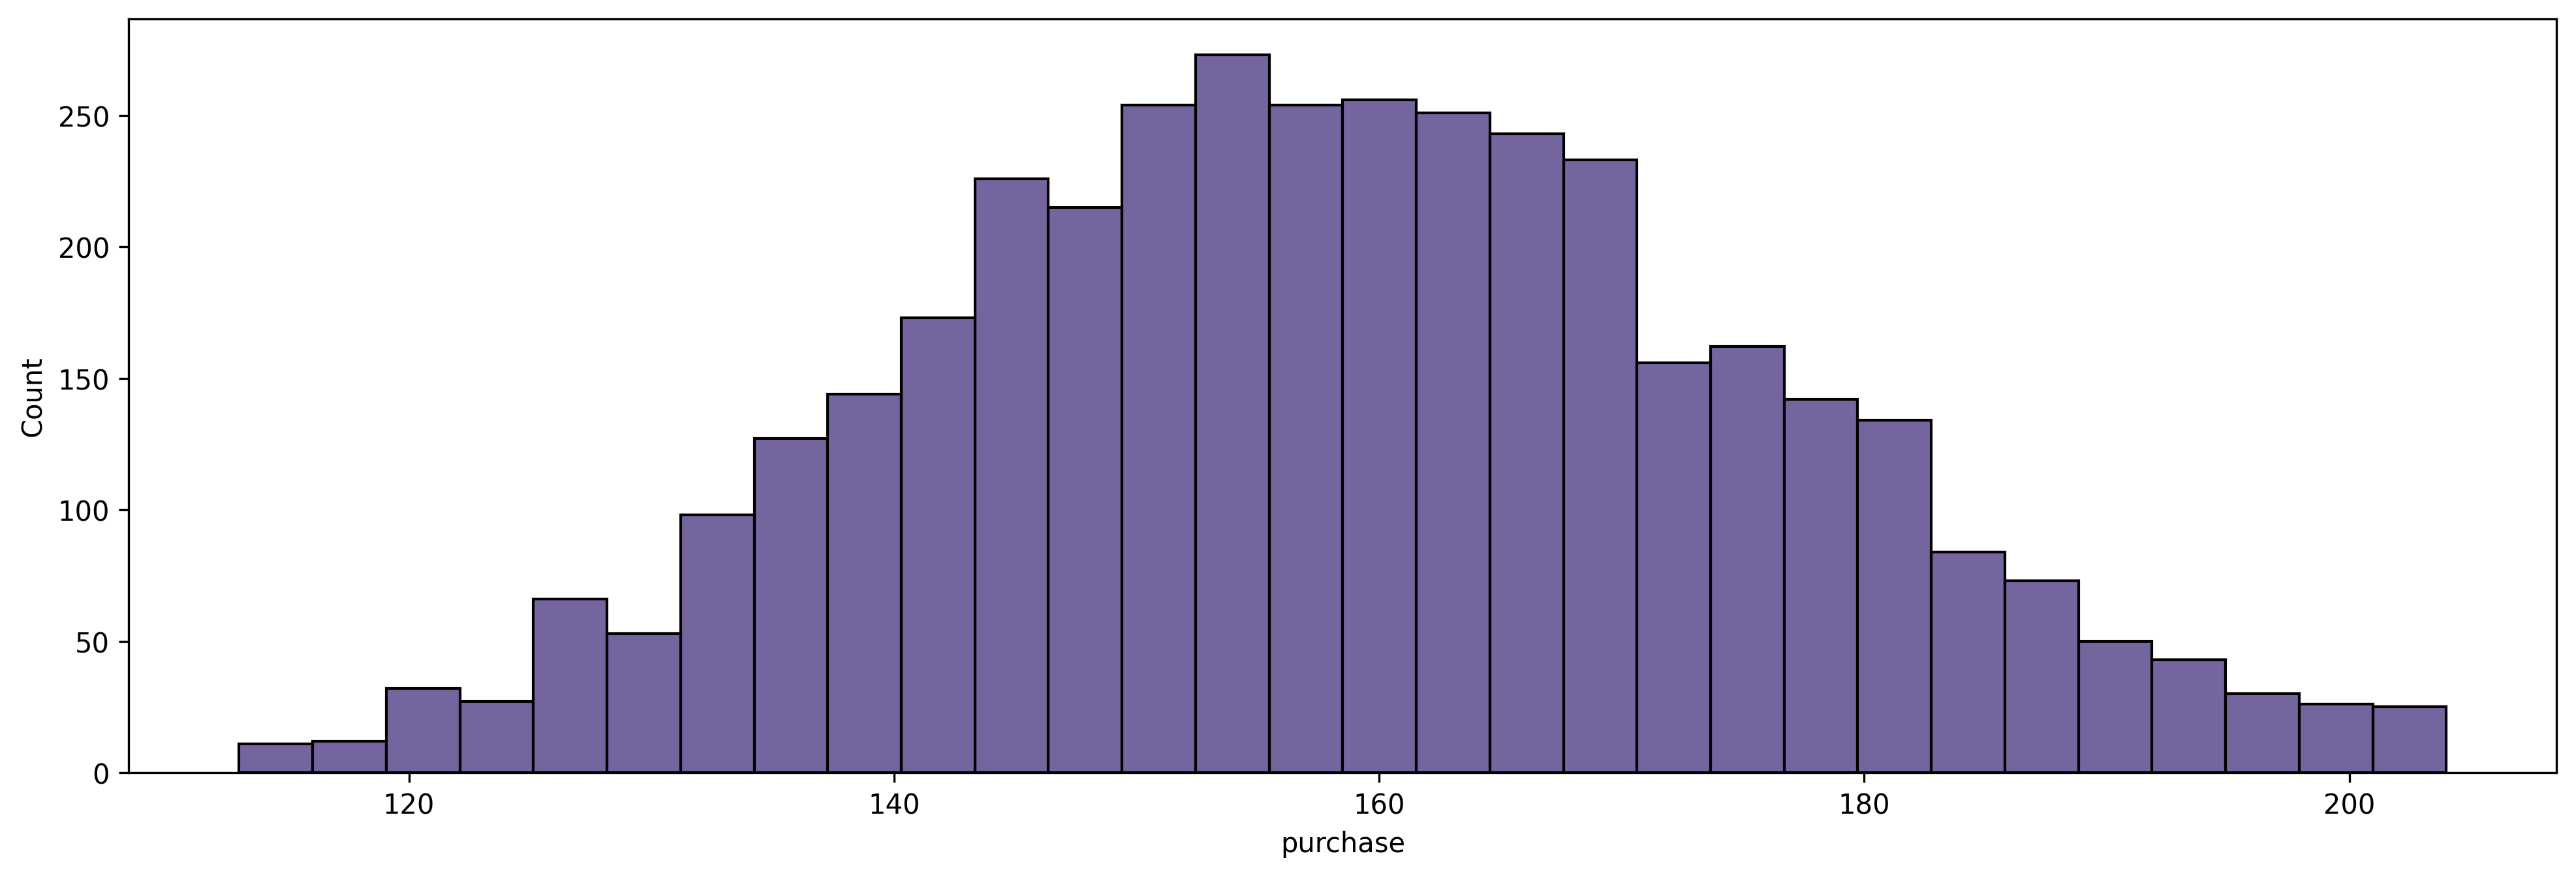

In [19]:
figure('big')
sns.histplot(dataset_clean['purchase'])
plt.show()

## Bivariate Analysis

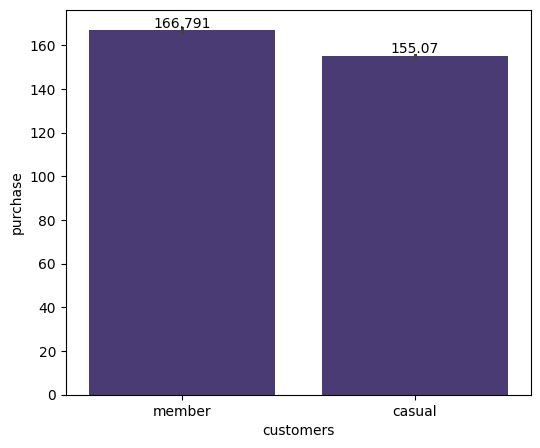

In [27]:
figure('small')
customers_purchase = sns.barplot(data=dataset_clean, x='customers', y='purchase')
customers_purchase.bar_label(customers_purchase.containers[0])
plt.show()

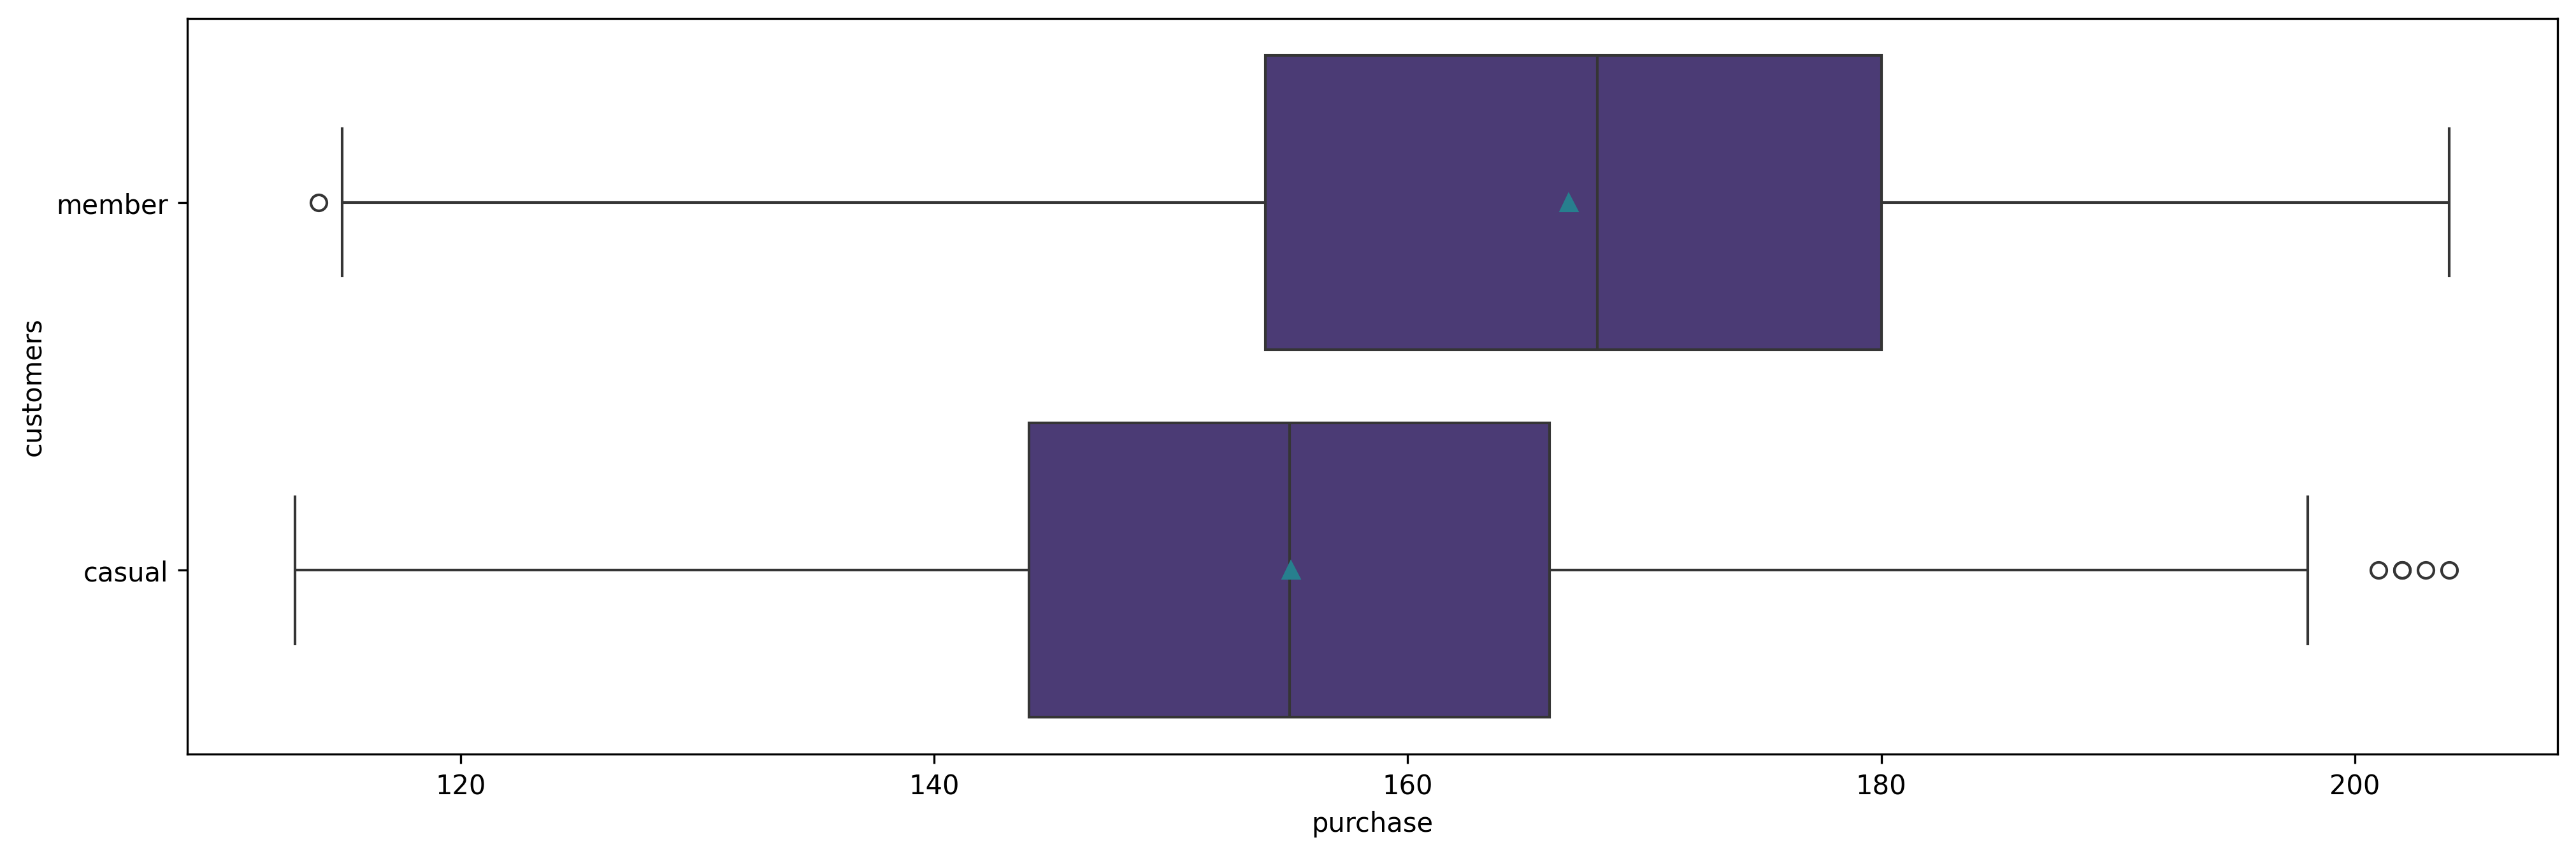

In [21]:
figure('big')
sns.boxplot(dataset_clean, x='purchase', y='customers', showmeans=True)
plt.show()

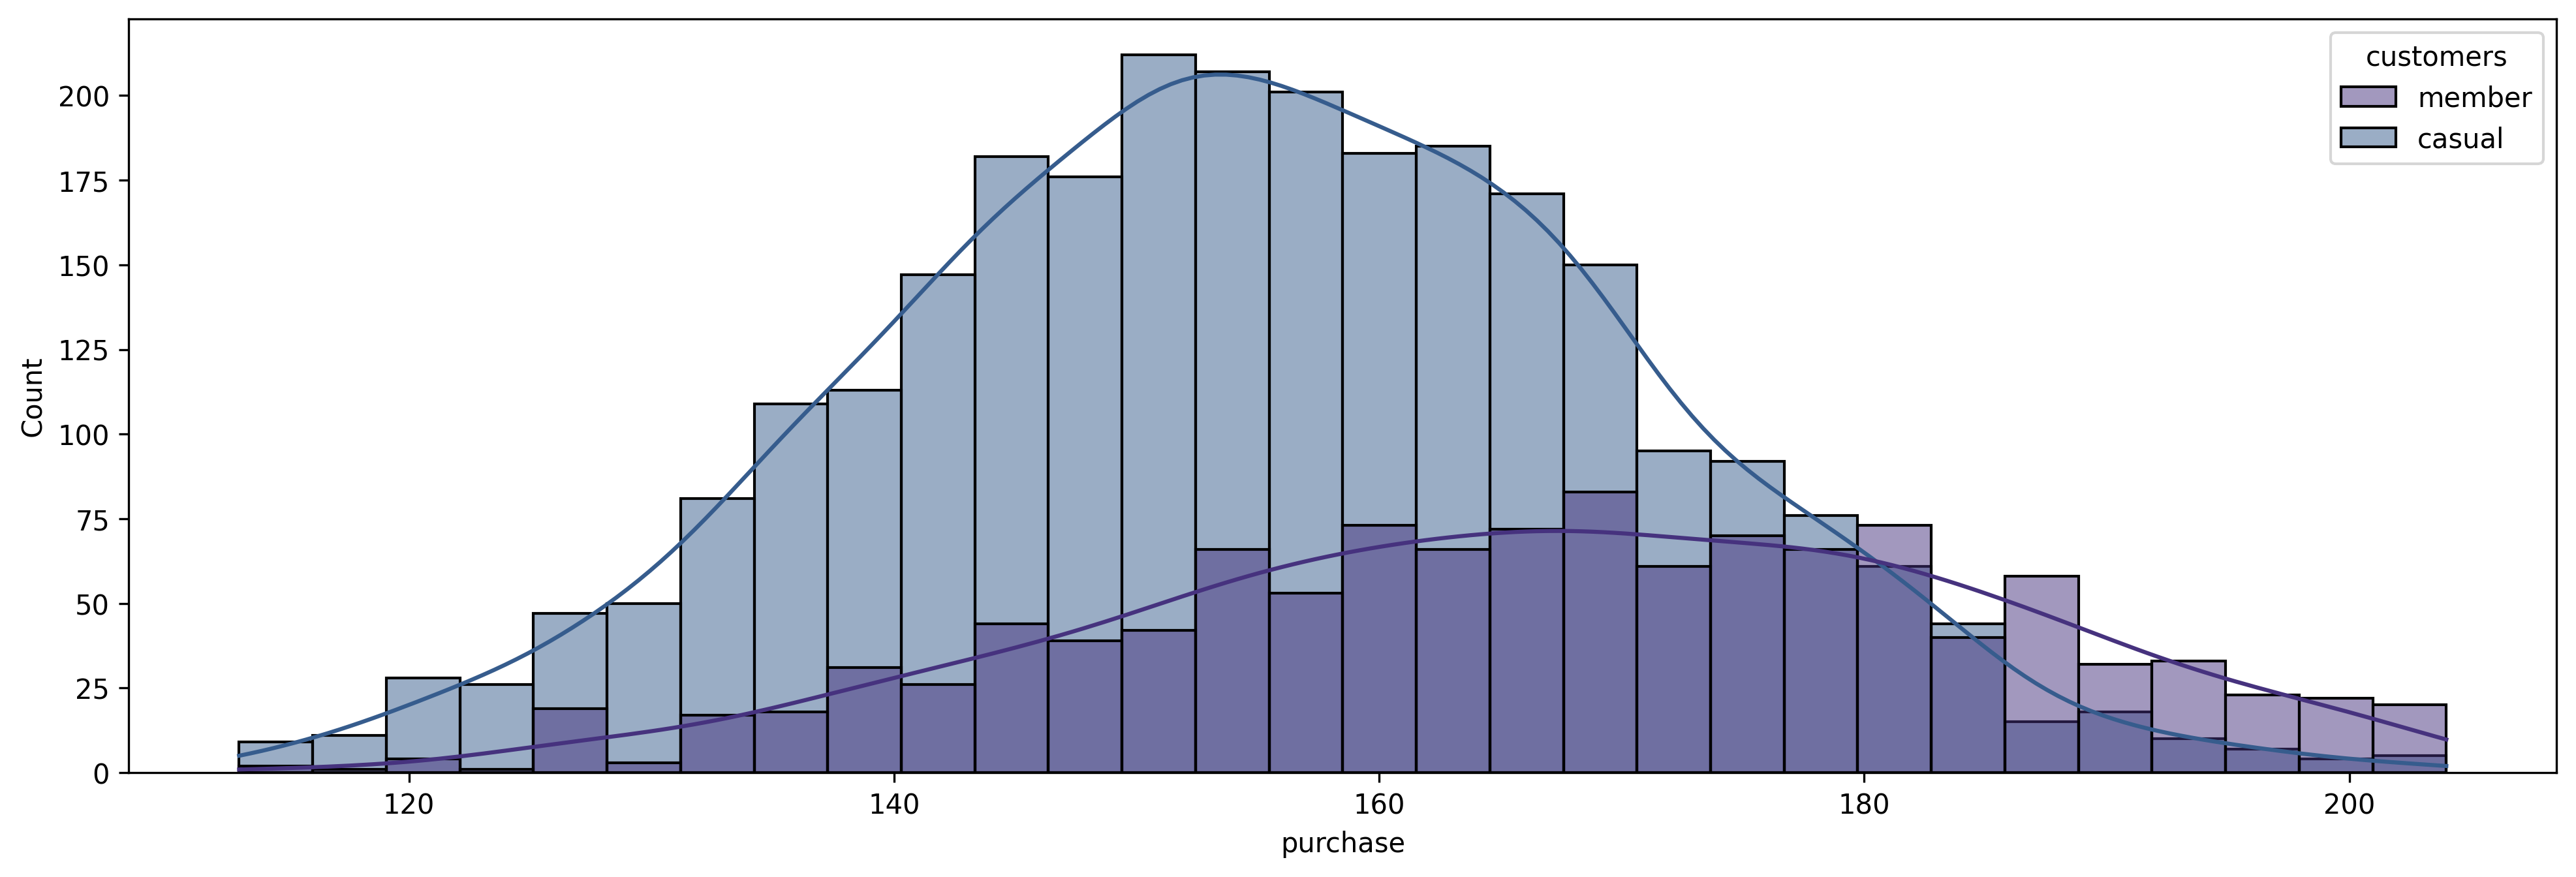

In [22]:
figure('big')
sns.histplot(dataset_clean, x='purchase', hue='customers', kde=True)
plt.show()

In [23]:
member = dataset_clean[dataset_clean['customers'] == 'member']
casual = dataset_clean[dataset_clean['customers'] == 'casual']

In [24]:
for i in dataset_clean['customers'].unique():
    print(f"category {i}")
    normality_test(dataset_clean[dataset_clean['customers'] == i]['purchase'])
    print()

category member
accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 2.5717900956778087e-06.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 6.045049641716031e-06.

category casual
accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 0.013016322840887886.

fail to reject H0 using pearsons test.
the variable is normally distributed with p-value: 0.05064334652363241.



## Meta Analyis

**Equal Median**

Conceptual:

$H0: M1 = M2$ where M1 is equal to M2

$H1: M1 \neq M2$ where M1 is not equal to M2

Mathematical:

$H0$ is when median for first array has same value with the median for second array.

$H1$ is when median for first array has a significantly different value with the median for second array.

In [25]:
stat, p = stats.mannwhitneyu(x=member['purchase'], y=casual['purchase'])
if p < 0.05:
    print('we accept to reject H0')
    print(f"member customers has a significant different value to casual member with p-value: {p}.")
elif p >= 0.05:
    print('we fail to reject H0')
    print(f"member customers has same value with casual member with p-value: {p}.")

we accept to reject H0
member customers has a significant different value to casual member with p-value: 2.609162908899705e-79.


**Greater Median**

Conceptual:

$H0: M1 \leq M2$ where M1 is equal to M2

$H1: M1 > M2$ where M1 is not equal to M2

Mathematical:

$H0$ is when median for first array has same value with the median for second array.

$H1$ is when median for first array has a significantly greater value with the median for second array.

In [26]:
stat, p = stats.mannwhitneyu(x=member['purchase'], y=casual['purchase'], alternative='greater')
if p < 0.05:
    print('we accept to reject H0')
    print(f"member customers has a significant greater value to casual member with p-value: {p}.")
elif p >= 0.05:
    print('we fail to reject H0')
    print(f"member customers has same value with casual member with p-value: {p}.")

we accept to reject H0
member customers has a significant greater value to casual member with p-value: 1.3045814544498525e-79.


# Interpreting Results